# Comparing error histograms between real and virtual scans

This was used for exploration of the noise distribution between the various error models. It is now obsolete, and I moved to using pandas after a while 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

Define some functions which load up the raw distances files. 

In [2]:
def load_measurement_file(name):
    """ Load a single txt file with the signed distances from the fitted plane."""
    return np.loadtxt(name)

def load_measurement_files_per_distance(glob_term):
    """ Load multiple distances files and"""
    files = sorted(glob.glob(glob_term))
    measurements = [load_measurement_file(f) for f in files]
    return np.concatenate(measurements)

In [3]:
from thesis.utils import laser_angle_to_id, sorted_angles, laser_id_to_angle

def get_errors_per_laser(run):
    errors_per_laser = {}
    for angle in sorted_angles:
        distances_for_angle = run[np.where(run[:,5] == angle)][:, 0]
        errors_per_laser[laser_angle_to_id[angle]] = distances_for_angle
    return errors_per_laser

In [4]:
real_distances = load_measurement_files_per_distance("/home/branislav/repos/github_indoor++/pcds/error_measurements/distances/5m_*floor.txt")
virtual_distances = load_measurement_files_per_distance("/home/branislav/repos/thesis/virtual_error_measurements/default_blensor_error_without_correction/5m_0*wall_with_angles.txt")

In [5]:
all_real_distances = load_measurement_files_per_distance("/home/branislav/repos/github_indoor++/pcds/error_measurements/distances/*m_*wall.txt")
all_real_distances

array([[ 1.27465e-02,  4.54609e-01,  9.38299e-01, -1.82794e-01,
         1.00000e+00, -1.50000e+01],
       [ 4.15826e-03,  4.60264e-01,  9.49794e-01,  1.03589e-01,
         1.00000e+00,  1.00000e+00],
       [ 3.65090e-03,  4.58821e-01,  9.46969e-01, -1.47784e-01,
         1.00000e+00, -1.30000e+01],
       ...,
       [-1.89929e-02,  6.91095e-01,  5.00643e+00, -4.72538e-01,
         1.00000e+00, -5.00000e+00],
       [ 6.15406e-03,  6.89681e-01,  4.98960e+00, -2.94727e-01,
         1.00000e+00, -3.00000e+00],
       [ 1.75533e-02,  6.90128e-01,  4.98630e+00, -1.19677e-01,
         1.00000e+00, -1.00000e+00]])

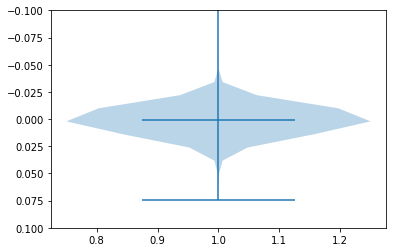

In [18]:
plt.violinplot(all_real_distances[:, 0], showmeans=True)
plt.ylim(0.1, -0.1)
plt.show()


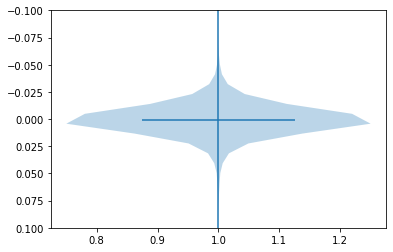

In [17]:
all_real_distances_floor = load_measurement_files_per_distance("/home/branislav/repos/github_indoor++/pcds/error_measurements/distances/*m_*floor.txt")
plt.violinplot(all_real_distances_floor[:, 0], showmeans=True)
plt.ylim(0.1, -0.1)
plt.show()


2.732154855233772
2.982594151537612


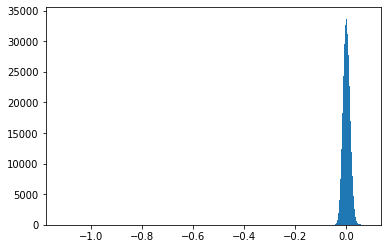

In [24]:
print(2*np.std(all_real_distances[:, 0]) *100)
print(2*np.std(all_real_distances_floor[:, 0]) *100)
plt.hist(all_real_distances[:, 0], bins="auto")
plt.show()

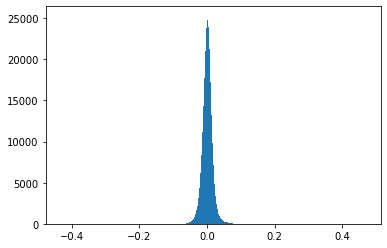

In [23]:
plt.hist(all_real_distances_floor[:, 0], bins="auto")
plt.show()

No handles with labels found to put in legend.


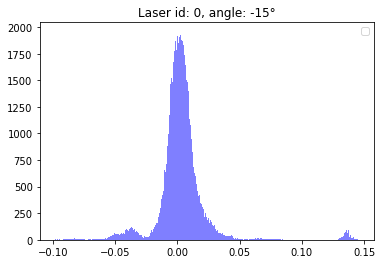

No handles with labels found to put in legend.


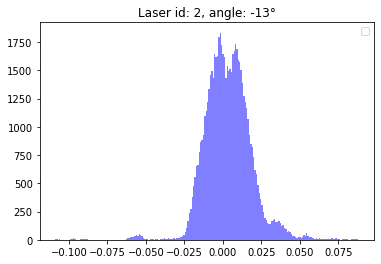

No handles with labels found to put in legend.


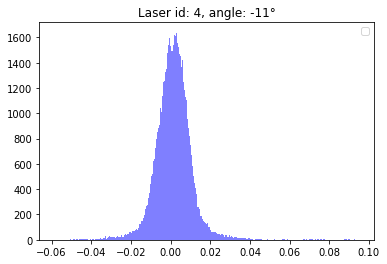

No handles with labels found to put in legend.


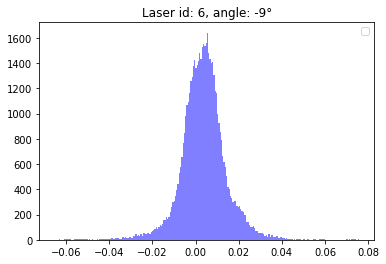

No handles with labels found to put in legend.


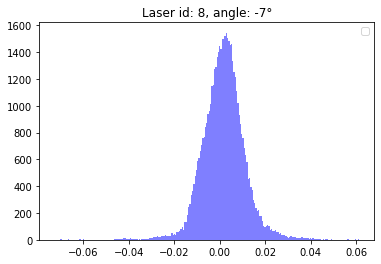

No handles with labels found to put in legend.


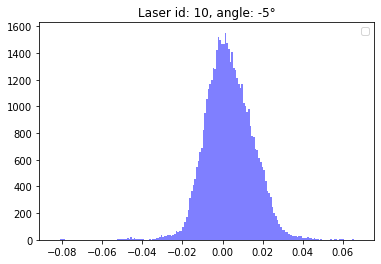

No handles with labels found to put in legend.


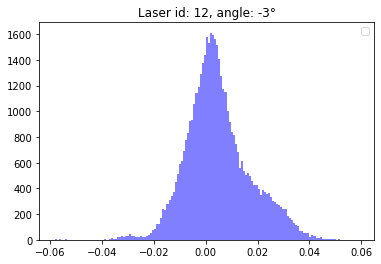

No handles with labels found to put in legend.


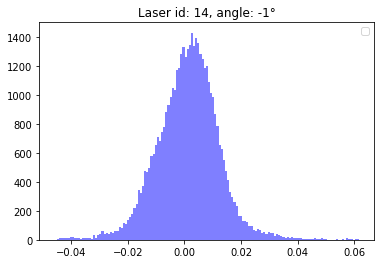

No handles with labels found to put in legend.


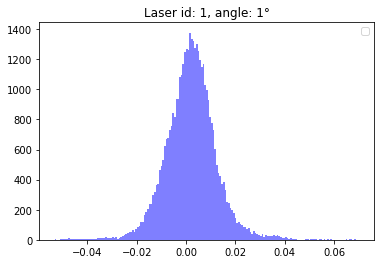

No handles with labels found to put in legend.


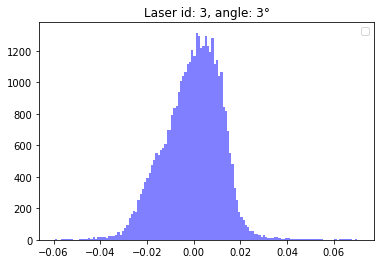

No handles with labels found to put in legend.


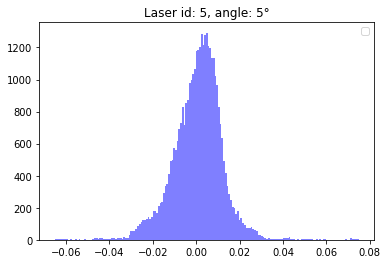

No handles with labels found to put in legend.


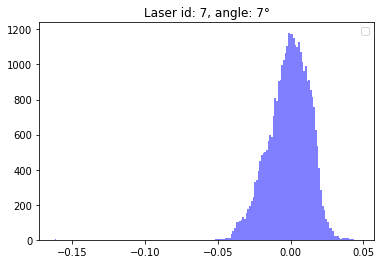

No handles with labels found to put in legend.


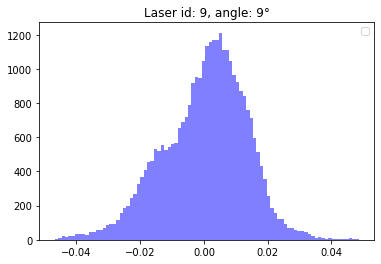

No handles with labels found to put in legend.


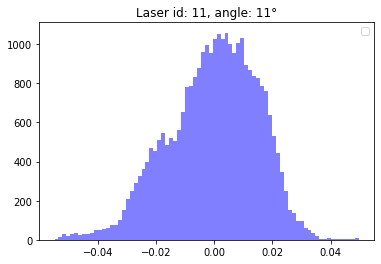

No handles with labels found to put in legend.


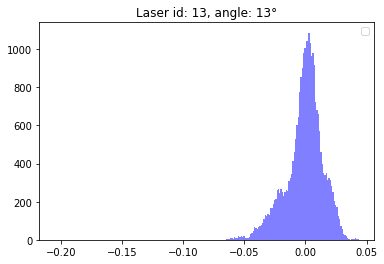

No handles with labels found to put in legend.


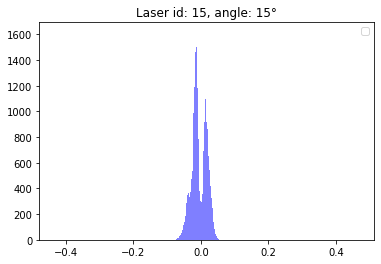

In [27]:
errors = get_errors_per_laser(real_distances)
virtual_errors = get_errors_per_laser(virtual_distances)
for k in virtual_errors.keys():
    plt.hist(errors[k], bins="auto", color=(0.0, 0.0, 1.0, 0.5))
#     plt.hist(virtual_errors[k], bins="auto", color=(1.0, 0.0, 0.0, 0.5), label="virtual")
    plt.title(f"Laser id: {k}, angle: {laser_id_to_angle[k]}°")
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


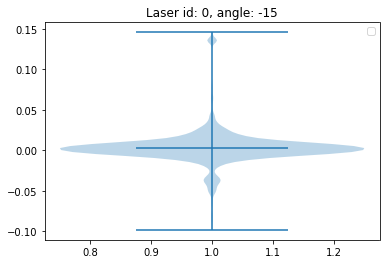

No handles with labels found to put in legend.


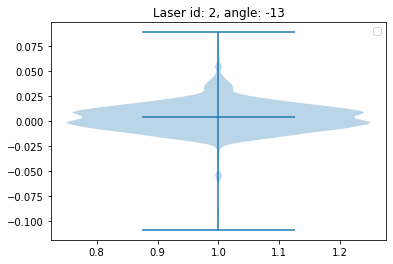

No handles with labels found to put in legend.


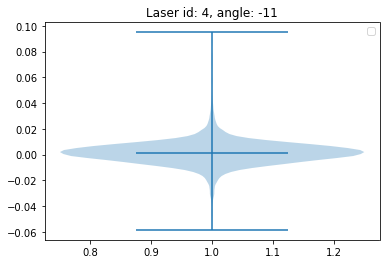

No handles with labels found to put in legend.


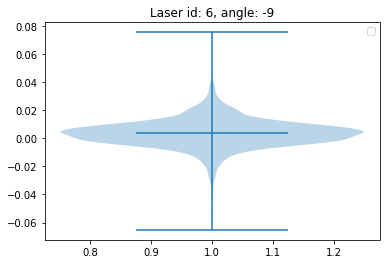

No handles with labels found to put in legend.


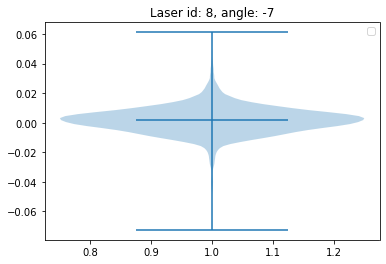

No handles with labels found to put in legend.


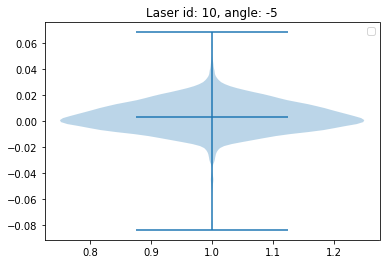

No handles with labels found to put in legend.


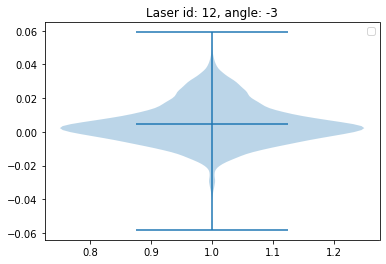

No handles with labels found to put in legend.


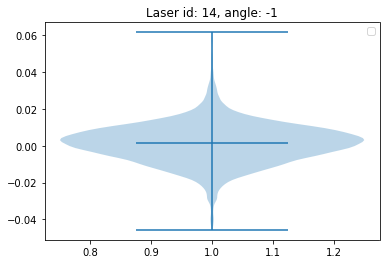

No handles with labels found to put in legend.


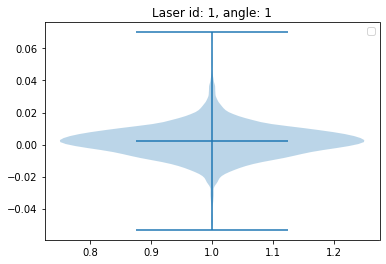

No handles with labels found to put in legend.


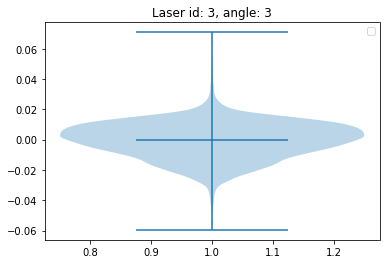

No handles with labels found to put in legend.


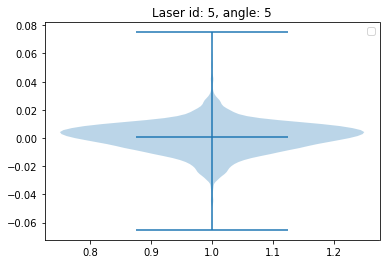

No handles with labels found to put in legend.


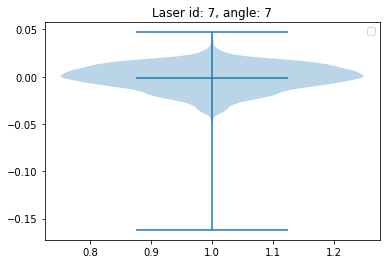

No handles with labels found to put in legend.


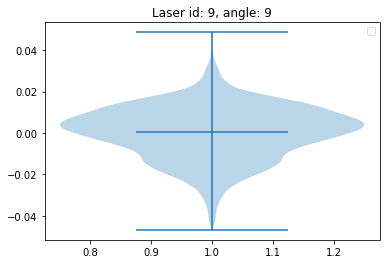

No handles with labels found to put in legend.


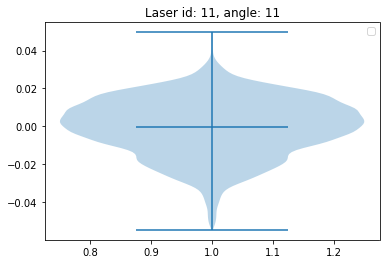

No handles with labels found to put in legend.


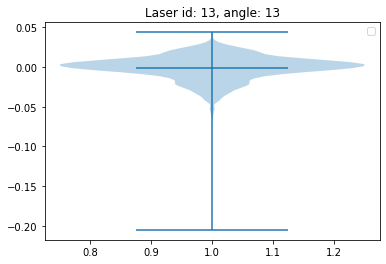

No handles with labels found to put in legend.


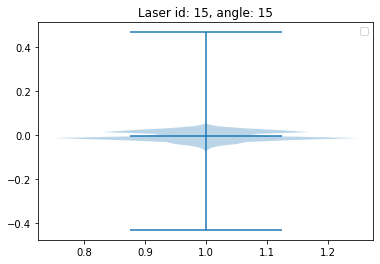

In [15]:
errors = get_errors_per_laser(real_distances)
virtual_errors = get_errors_per_laser(virtual_distances)
for k in virtual_errors.keys():
    plt.violinplot(errors[k], showmeans=True)
#     plt.violinplot(virtual_errors[k], showmeans=True)
    plt.title(f"Laser id: {k}, angle: {laser_id_to_angle[k]}°")
    plt.legend()
    plt.show()